# Doximity Data Analyst Coding Challenge
## Author: Nichollette Acosta 

## PART 1
Background

In our newsfeed, we show both news content and social updates to our users. In the case of social updates, we want to surface to a user (userA) content about the other users on the site he or she cares most about. We utilize an "affinity score" between userA and other users to quantify the strength of their relationship. In our newsfeed, our goal is then to rank order social updates according to this affinity score. 

You are given a large CSV file of affinity scores for every unique user-user pair. Your task is to find, for every user_id value, the other user_id value that maximizes the affinity score.

You should provide python code that reads the data from this CSV and returns the desired "best matches" (highest affinity scores). The exact format of your function’s output is up to you, but it should be something that is easy to validate and that can be called by other functions. If you make any assumptions about these data - you are welcome to do so - please make these assumptions clear in your solution and write a sentence or two to justify the

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

________________________________________________________________________________________________________________________________

I made the assumption that that various data may not always be labeled to the same naming convention, therefore I grab the column names and then grab relevant data. I used pandas and the chunksize parameter to load chunks of data. 

Due to time contrainsts the chunksize is hardcoded and the input file, this could be customized more to automatically detect number of users, n, and automatically assign chunksize to n-1. 




In [144]:
chunks = pd.read_csv("affinity.csv", chunksize=2,iterator=True)
output_df = pd.DataFrame(columns=['UserA', 'UserB', 'Affinity Score'])

for chunk in chunks:
    print(chunk)
    userA_col = chunk.columns[0]
    userB_col = chunk.columns[1]
    affinity_col = chunk.columns[2]
    temp = [userB_value, ',',affinity_value]
    affinity_dict.update({userA_value:temp})
    
    print(chunk.loc[chunk[affinity_col].idxmax()].to_string())
    


   UserA  UserB  Affinity score
0      1      2            0.80
1      1      3            0.09
UserA             1.0
UserB             2.0
Affinity score    0.8
   UserA  UserB  Affinity score
2      2      1            0.09
3      2      3            0.56
UserA             2.00
UserB             3.00
Affinity score    0.56
   UserA  UserB  Affinity score
4      3      1            0.54
5      3      2            0.99
UserA             3.00
UserB             2.00
Affinity score    0.99


## PART 2  

## 1) Using the table names and relations shown in the schema diagram above, please write SQL queries designed to address the following questions (since the data are not in a database, we're just looking for the queries you would write):  

<b>a. What is the average age of users by region?</b>

SELECT AVG(age)<br>
FROM users<br>
GROUP BY region;<br>


<b>b. Can you generate a ranked list of the top 10 most viewed users based on internal profile views?</b>

SELECT COUNT(viewed_user_id)<br>
FROM internal_profile_views<br>
GROUP BY viewed_user_id<br>
ORDER BY COUNT(viewed_user_id) DESC<br>
LIMIT 10;<br>


<b>c. Which region gets the most viewed users based on internal profile views?</b>

SELECT COUNT(U.region), F.viewed_user_id as user_regions<br>
FROM user_frequency F RIGHT JOIN users U<br>
ON F.viewed_user_id == U.id <br>
GROUP BY U.region <br>
ORDER BY COUNT(U.region) DESC<br>
LIMIT 1; <br>

## 2) The product manager has some questions about the data and is looking to you for some insight. Using python, please perform analyses using the compressed CSVs provided (assume they are up-to-date dumps of the tables shown in the database schema above) to address the following questions, providing a written explanation to the product manager of what you find for each.

In [147]:
user_data = pd.read_csv("users.csv")
user_profile_urls = pd.read_csv("user_profile_urls.csv")
titles = pd.read_csv("titles.csv")
internal_profile_data = pd.read_csv("internal_profile_views.csv")
external_profile_data = pd.read_csv("external_profile_views.csv")

#### a. Identify one or two trends in the data that are interesting from a data perspective. Do the trends you observe have any effect on how you would build your ranking feature? In a sentence or two, how would you communicate these findings to a non-technical project manager?

Sorting the data from <i>users.csv</i> by age and firstname. 

In [148]:
user_data = user_data.sort_values(['age', 'firstname'], ascending=True)
user_data.head()

,id,firstname,lastname,age,region,title_id
31028,225306,Aaron,Smith,20,Other,6
44740,335488,Aaron,Homer,20,South,1
49333,359101,Aaron,Lemasters,20,Midwest,6
52088,378358,Aaron,Allison,20,Northeast,2
55808,403417,Aaron,King,20,Midwest,5


Looking at the shape of our user data we see have 600,000 rows (users). 

In [149]:
user_data.shape

(600000, 6)

Plotting a histogram to look at the distribution of age of our users.

Text(0.5,1.05,'Distribution of users by age')

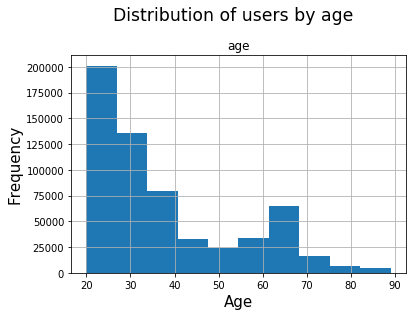

In [150]:
plt.figure();
user_data.hist(column='age')
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.suptitle('Distribution of users by age', x=0.5, y=1.05, ha='center', fontsize='xx-large')

### The first trend we can see is in age. We see a much larger distribution in ages < 40.  I would then suggest we look into the age and its relaiton to other attriburtes (like region, profession, etc.)

Now I am going to look at the tiles and see if there is anything significant. 

In [151]:
titles.head()

,id,title
0,2,Assistant professor
1,1,Full professor
2,6,Other
3,3,Postdoctoral assistant
4,5,Student


In [152]:
titleFreqTable = user_data['title_id'].value_counts()
list(titleFreqTable.index)

[5, 3, 6, 2, 1]

Text(0.5,1,'User Professions')

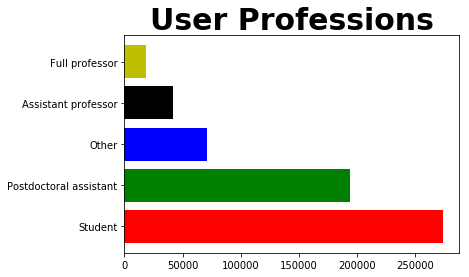

In [153]:
labelNames = ['Student', 'Postdoctoral assistant', 'Other', 'Assistant professor', 'Full professor']
positionsForBars = list(range(len(labelNames)))
my_colors = 'rgbkymc'
plt.barh(positionsForBars,titleFreqTable.values, color=my_colors) # plot our bars
plt.yticks(positionsForBars,labelNames) # add lables
plt.title("User Professions", fontweight="bold",fontsize=30)

### Looking at professions we see that there is a trend of students. I would suggest looking further into this.

Next I looked for another trend among regions.

Text(0.5,1,'Most Common Regions')

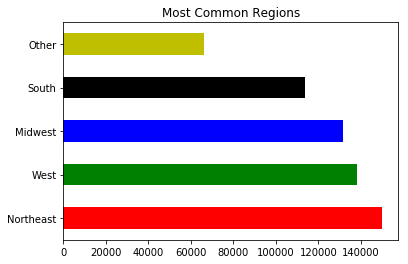

In [154]:
my_colors = 'rgbkymc'
user_data['region'].value_counts(sort=True).plot.barh(color=my_colors).set_title('Most Common Regions')

### a. 
### i) How much web traffic are users' profiles receiving from combined internal and external sources?

In [156]:
print(external_profile_data.shape)
external_sum = external_profile_data['unique_PageViews'].sum()
print("\n",external_sum)

(335636, 3)

 1318492


In [157]:
internal_profile_data = internal_profile_data.sort_values(['user_id'], ascending=True)
print("\n",internal_profile_data.shape)


 (10806, 4)


In [158]:
internal_sum = 10806
total_views_sum = external_sum + internal_sum 
internal_percent = (internal_sum/total_views_sum) *100
print(internal_percent)
external_percent = (external_sum/total_views_sum) *100
print(external_percent)

0.8129102729410561
99.18708972705895


In [159]:
print("Web Traffic from combined resources: ", total_views_sum)

Web Traffic from combined resources:  1329298


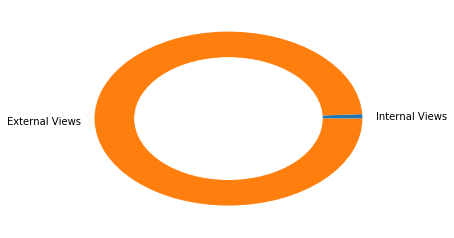

In [160]:
names = 'Internal Views', 'External Views'
size_of_groups = [internal_percent, external_percent]
plt.pie(size_of_groups,labels=names)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

### ii)  Is it reasonable to include both sources in the product feature?

### Looking at the data, it seems that external views is the generates the most views, looking at the source may potentially be sufficient enough.

### b) How would you present the profile view data in a “Rank for profile views” feature? Please provide code to achieve this.

Looking at external views first I would sort our dateframe based on unique page views 

In [203]:
external = external_profile_data.sort_values(['unique_PageViews'], ascending=False)
external.head()

,id,public_profile_url,unique_PageViews
248373,248374,/pub/patricia-valenzuela,1124
23582,23583,/cv/dana-oliveros-ms,1086
249587,249588,/cv/clayton-ritchie,764
222280,222281,/cv/ernestine-lusk-phd,593
207890,207891,/cv/bobbie-banks-phd,563


Now I am going look at the internal profile data.

In [168]:
internal_profile_data = internal_profile_data.sort_values(['viewed_user_id'])
internal_profile_data.head()

,id,user_id,viewed_user_id,created_at
10398,6680,4185263,10058,2014-01-01 10:26:22
7854,5870,3162674,10103,2014-01-01 05:58:15
5723,3029,2252759,10419,2014-01-01 18:10:06
8315,1026,3341405,10419,2014-01-01 06:53:05
3448,5436,1382250,10610,2014-01-01 03:24:49


In [66]:
viewed_users = internal_profile_data['viewed_user_id']
type(viewed_users)

pandas.core.series.Series

In [93]:
viewed_users.value_counts().head()

1740253    406
2185215    383
2632343    180
3086119     88
1287442     88
Name: viewed_user_id, dtype: int64

In [251]:
print('Top Ranked Profiles \n')
for i in viewed_users.value_counts().head(10).index.tolist():
    p = user_data.loc[user_data['id'] == i, ['firstname', 'lastname','age','region']]
    print(p.to_string(index=False))
    #profile url
    c = user_profile_urls.loc[user_data['id'] == i]['profile_url']
    #profession
    d = user_data.loc[user_data['id'] == i]['title_id']
    for t in d:
        x = titles.loc[titles['id'] == t]['title']
        for m in x:
            print("Profession: ", m)
   
    for t in c:

        d2 = external.loc[external['public_profile_url'] == t]['unique_PageViews']
        print("Public URL: ", t) 
        if not d2.empty:
            for l in d2:
                print("External Page Views: ", l, "\n")
        else:
            print("\n")


Top Ranked Profiles 

firstname lastname  age     region
   Tommy   Proulx   20  Northeast
Profession:  Full professor
Public URL:  /cv/tommy-proulx


firstname lastname  age   region
    Adam    Towns   21  Midwest
Profession:  Full professor
Public URL:  /pub/adam-towns
External Page Views:  2 

firstname lastname  age region
   Diane  Holland   24  South
Profession:  Full professor
Public URL:  /pub/diane-holland


firstname lastname  age     region
Savannah   Murphy   21  Northeast
Profession:  Assistant professor
Public URL:  /cv/savannah-murphy


firstname  lastname  age   region
    Edna  Castillo   29  Midwest
Profession:  Full professor
Public URL:  /pub/edna-castillo


firstname lastname  age   region
 Shirley   Medina   60  Midwest
Profession:  Full professor
Public URL:  /cv/shirley-medina


firstname  lastname  age   region
  Sandra  Phillips   67  Midwest
Profession:  Full professor
Public URL:  /pub/sandra-phillips


firstname lastname  age   region
  Howard   Rivera   2